# Определение перспективного тарифа для телеком компании

## Описание проекта

Компания «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
В рамках проекта предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

### Тариф Смарт

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

### Тариф Ультра

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

### Примечание

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

 ## Общая информация

### Изучение данных из файла

In [2]:
import pandas as pd #  Импортируем библиотеку для работы с базами данных 
import matplotlib.pyplot as plt #  Импортируем библиотеку для построения графической информации
import numpy as np 
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [3]:
df_calls.head() #  Просмотр таблицы со звонками

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
df_calls.sort_values(by = 'call_date').head()

,id,call_date,duration,user_id
180968,1453_160,2018-01-01,0.00,1453
181239,1453_431,2018-01-01,19.92,1453
76907,1193_169,2018-01-01,13.29,1193
181903,1453_1095,2018-01-01,5.63,1453
181106,1453_298,2018-01-01,15.25,1453


In [6]:
df_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [7]:
df_internet.head() #  Просмотр таблицы по использованию интернет-трафика

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [10]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
df_messages.sort_values(by = 'message_date').tail()

,id,message_date,user_id
52443,1231_1064,2018-12-31,1231
14184,1060_21,2018-12-31,1060
31402,1139_37,2018-12-31,1139
89442,1373_454,2018-12-31,1373
98381,1402_185,2018-12-31,1402


In [12]:
df_tariffs # Вывод таблицы с информацией о тарифах

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
df_users.info() #  Сведения об абонентах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
df_users.sort_values(by = 'reg_date').head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
453,1453,50,NaN,Москва,Кузьма,Акуленко,2018-01-01,ultra
193,1193,55,NaN,Тамбов,Арсен,Безруков,2018-01-01,smart
55,1055,39,NaN,Казань,Луиза,Березина,2018-01-02,smart
155,1155,71,NaN,Ставрополь,Александр,Чернов,2018-01-02,smart
375,1375,53,NaN,Пенза,Мария,Акимычева,2018-01-04,ultra


In [15]:
df_users = df_users.rename({'tariff':'tariff_name'}, axis = 'columns') #  Поле с названием тарифа встречается в разных таблицах
#  Приведем его наименование к однообразию

### Вывод

Данные представлены в виде 5 датафреймов, в которых содержится информация о 500 пользователях мобильного оператора и их расхдах на мобильную связь. Пропущеные данные имеются в поле churn_date для действующих пользователей на момент выгрузки данных. Приведенные данные описывают поведение пользователей с 1 января по 31 декабря 2018 г. 

## Подготовка данных

### Заполнение пропусков

Для удобства проведения дальнейших расчетов заполним пропущенные данные в поле churn_date значением 2018-12-31

In [16]:
df_users['churn_date'] = df_users['churn_date'].fillna(value = '2018-12-31')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_date     500 non-null object
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_date       500 non-null object
tariff_name    500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Преобразование типов данных

Сведения о дате в таблицах не распознаны как тип данных datetime, проведем их преобразование 

In [17]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
#  Для преобразования поля передаем формат его заполнения информации о дате 
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_date     500 non-null datetime64[ns]
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_date       500 non-null datetime64[ns]
tariff_name    500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Округление данных

В соответствии с правилами тарификации потребляемых услуг проведем округление данных

In [18]:
def round_calls(x): #  Объявляем функцию для округления данных в поле duration
    from math import ceil
    if x > 0:
        x = ceil(x)
    return x    
df_calls['duration'] = df_calls['duration'].apply(round_calls).astype('int') #  Применяем функцию round_calls к выбранному полю
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [19]:
import numpy as np

In [20]:
np.ceil(df_calls['duration'])

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64

Преобразуем поля с датой к формату datetime

In [21]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

Группируем информацию о потребляемых услагах связи в представленных таблицах относительно пользователей и периода потребления

In [22]:
calls_log = df_calls.groupby(['user_id', 'month']).agg({'duration':('count', 'sum')}).reset_index() #  Группируем данные
calls_log.columns = ('user_id', 'month', 'count_calls', 'duration') #  Избавляемся от мультииндекса
messages_log = df_messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
messages_log.columns = ('user_id', 'month', 'count_sms')
internet_log = df_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
internet_log.columns = ('user_id', 'month', 'traffic')

Выводим последовательно сгруппированные данные

In [23]:
internet_log.head() #  Трафик

,user_id,month,traffic
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [24]:
calls_log.head(15) #  Звонки

,user_id,month,count_calls,duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


In [25]:
messages_log.head(15) #  Сообщения

,user_id,month,count_sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [26]:
def round_traffic(y): #  Функция для округления трафика по правилам оператора (до 1 Гб в большую сторону)
    if y % 1024 > 0:
        y = (y // 1024) * 1024 + 1024
    return y
internet_log['traffic'] = internet_log['traffic'].apply(round_traffic).astype('int') #  Применяем функцию к полю
internet_log.head()

,user_id,month,traffic
0,1000,5,3072
1,1000,6,23552
2,1000,7,14336
3,1000,8,14336
4,1000,9,15360


In [27]:
df_users.query('user_id == "1489"')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
489,1489,35,2018-12-31,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


Объединяем таблицы

In [28]:
df_log = calls_log.merge(
    internet_log, 
    on = ['user_id', 'month'], 
    how = 'outer'
    ).merge(
    messages_log, 
    on = ['user_id', 'month'], 
    how = 'outer'
    ).fillna(0)
df_log.user_id.nunique()


498

In [29]:
df_log = df_log.merge(
    df_users, 
    on = 'user_id', 
    how ='left').merge(
    df_tariffs, 
    on = 'tariff_name', 
    how ='left'
)

df_log.user_id.nunique()

498

In [30]:
df_log.head()


,user_id,month,count_calls,duration,traffic,count_sms,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,3072.0,22.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,23552.0,60.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,14336.0,75.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,14336.0,81.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,15360.0,57.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [31]:
df_log.user_id.nunique()

498

In [32]:
df_log.shape

(3214, 20)

Вводим в таблицу дополнительное поле с расчетом расходов каждого абонента в месяц

In [33]:
def costs(i): #  Объявляем функцию
    result = i['rub_monthly_fee']
    if i['duration'] > i['minutes_included']:
        result += (i['duration'] - i['minutes_included']) * i['rub_per_minute']
    if i['count_sms'] > i['messages_included']:
        result += (i['count_sms'] - i['messages_included']) * i['rub_per_message']
    if i['traffic'] > i['mb_per_month_included']:
        result += (i['traffic'] - i['mb_per_month_included']) * i['rub_per_gb'] / 1024
    return result
df_log['costs'] = df_log.apply(costs, axis = 1)
df_log.sort_values(by = 'duration')

,user_id,month,count_calls,duration,traffic,count_sms,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,costs
1606,1257,8,2.0,0.0,25600.0,157.0,21,2018-12-31,Санкт-Петербург,Габриель,...,2018-06-17,ultra,1000,30720,3000,1950,150,1,1,1950.0
3188,1106,10,0.0,0.0,14336.0,33.0,67,2018-12-31,Калуга,Исаак,...,2018-04-26,ultra,1000,30720,3000,1950,150,1,1,1950.0
3187,1106,9,0.0,0.0,22528.0,23.0,67,2018-12-31,Калуга,Исаак,...,2018-04-26,ultra,1000,30720,3000,1950,150,1,1,1950.0
3186,1106,8,0.0,0.0,19456.0,25.0,67,2018-12-31,Калуга,Исаак,...,2018-04-26,ultra,1000,30720,3000,1950,150,1,1,1950.0
3185,1106,7,0.0,0.0,22528.0,24.0,67,2018-12-31,Калуга,Исаак,...,2018-04-26,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,1377,10,178.0,1401.0,5120.0,10.0,59,2018-12-31,Брянск,Альфред,...,2018-02-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1237,1196,6,176.0,1410.0,23552.0,153.0,25,2018-12-31,Воронеж,Фёдор,...,2018-05-28,ultra,1000,30720,3000,1950,150,1,1,1950.0
1359,1216,12,198.0,1435.0,20480.0,64.0,74,2018-12-31,Волгоград,Рустам,...,2018-11-23,smart,50,15360,500,550,200,3,3,4397.0
2359,1377,3,203.0,1609.0,3072.0,20.0,59,2018-12-31,Брянск,Альфред,...,2018-02-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


In [34]:
df_log['costs'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: costs, dtype: float64

### Вывод

Проведено преобразование всех полей, содержащих сведения о дате к типу данных datetime, таблицы подготовлены для проведения анализа содержащийся в них информации, в начале и конце таблицы по расходам в месяц пользователи на тарифе smart

## Анализ данных

### Анализ потребелния услуг связи

Сформируем срезы данных для пользователей тарифов smart и ultra

In [35]:
df_smart = df_log.query('tariff_name == "smart"')
df_ultra = df_log.query('tariff_name == "ultra"')

Построение графиков потребления услуг связи:

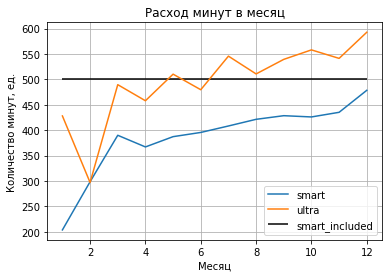

In [36]:

plt.plot(df_smart.pivot_table(index = 'month', values = 'duration', aggfunc = 'mean'), label = 'smart') #  График тарифа smart
plt.plot(df_ultra.pivot_table(index = 'month', values = 'duration', aggfunc = 'mean'), label = 'ultra') #  График тарифа ultra
plt.hlines(df_tariffs['minutes_included'][0], 1, 12, label = 'smart_included') #  Отмечаем на графике размер пакета минут 
#  по тарифу smart
plt.title('Расход минут в месяц') #  Присваиваем графику заголовок 
plt.xlabel('Месяц') #  Отмечаем оси графика
plt.ylabel('Количество минут, ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

Объем потребленных услуг по тарифу ultra превышает уровень расходов на тарифе smart

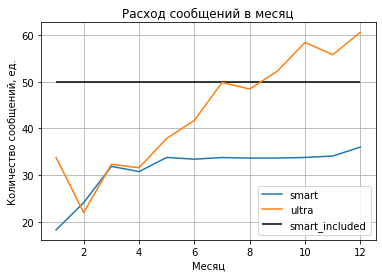

In [37]:
plt.plot(df_smart.pivot_table(index = 'month', values = 'count_sms', aggfunc = 'mean'), label = 'smart')
plt.plot(df_ultra.pivot_table(index = 'month', values = 'count_sms', aggfunc = 'mean'), label = 'ultra')
plt.hlines(df_tariffs['messages_included'][0], 1, 12, label = 'smart_included')
plt.title('Расход сообщений в месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений, ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

Характер потребления услуг в части отправки сообщений сохраняется, перерасход пакетов не допускается

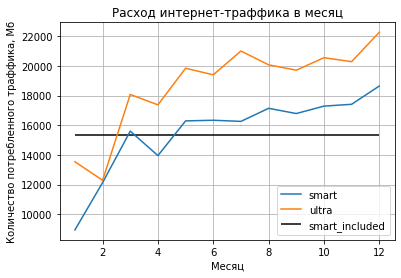

In [38]:
plt.plot(df_smart.pivot_table(index = 'month', values = 'traffic', aggfunc = 'mean'), label = 'smart')
plt.plot(df_ultra.pivot_table(index = 'month', values = 'traffic', aggfunc = 'mean'), label = 'ultra')
plt.hlines(df_tariffs['mb_per_month_included'][0], 1, 12, label = 'smart_included')
plt.title('Расход интернет-траффика в месяц') 
plt.xlabel('Месяц')
plt.ylabel('Количество потребленного траффика, Мб')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

Наблюдается перерасход пакета траффика по тарифу smart

### Анализ расходов по тарифам

In [39]:
df_smart['costs'].describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: costs, dtype: float64

In [40]:
df_ultra['costs'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: costs, dtype: float64

In [41]:

variance_smart = np.var(df_smart['costs'])
print(variance_smart)
variance_ultra = np.var(df_ultra['costs'])
print(variance_ultra)
std_dev_smart = np.std(df_smart['costs'])
print(std_dev_smart)
std_dev_ultra = np.std(df_ultra['costs'])
print(std_dev_ultra)

669485.2209234245
141373.07325620347
818.2207653949051
375.9961080333192


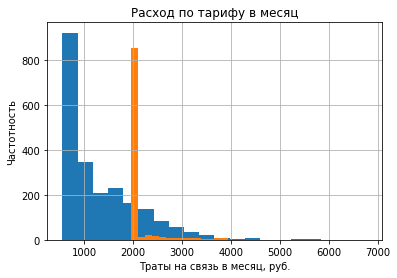

In [42]:
df_smart['costs'].hist(bins = 20, label = 'smart')
df_ultra['costs'].hist(bins = 20, label = 'ultra')
plt.title('Расход по тарифу в месяц') 
plt.xlabel('Траты на связь в месяц, руб.')
plt.ylabel('Частотность')
plt.show()

Траты по тарифу ultra в среднем примерно в два раз превышают расходы по тарифу smart

### Вывод

Пользователи тарифа ultra более активно потребляют услуги связи, при этом их расходы в среднем примерно в два раза превышают расходы пользователй на тарифе smart. При этом пакет траффика, предоставляемого на тарифе smart, часто оказывается недостаточным - требуется пересмотр объема предоставляемых услуг либо рассмотреть возможность предоставления нового тарифа с большим объемом траффика

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для проверки заявленной гипотезы формулируем нулевую гипотезу: средняя выручка пользователей тарифов ultra и smart не различается при уровне значимости 5%:

Формулируем нулевую гипотезу - средняя выручка пользователей тарифов ultra и smart одинаковая. Альтернативная гипотеза - средняя выручка пользователей тарифов различается. В случае значительного отклонения от среднего значения нормального распределения нулевая гипотеза подлежит пересмотру на альтернативную 

In [43]:
from scipy import stats as st #  Вызываем библиотеку для работы с совокупностями данных
alpha = 0.05 #  Уровень значимости
results = st.ttest_ind(df_smart['costs'], df_ultra['costs']) #  Проверяем гипотезу
print(results.pvalue < alpha)

True


Нулевая гипотеза опровергнута, есть основания считать, что средняя выручка пользователей двух тарифов различается

### Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов

Формулируем нулевую гипотезу: средняя выручка пользователей из Москвы и пользователей из других регионов не различается

In [44]:
results_msk = st.ttest_ind(df_log.query('city == "Москва"')['costs'], df_log.query('city != "Москва"')['costs'], equal_var = False)
print(results_msk.pvalue)

0.5257376663729298


Статистика разности свидетельствует об отсутствии явных отличий выручки в Москве и других регионах, нулевая гипотеза не опровергнута

## Общий вывод

На основании предоставленных данных по абонентам оператора «Мегалайн» за 2018 год следует сделать следующие выводы:
пользователи тарифа ultra более охотно потребляют услуги связи;
выручка по тарифу ultra примерно в 2 раза превышает выручку по тарифу smart;
различий в размере ежемесячных расходов на связь абонентов из Москвы и из других регинов не выявлено